In [1]:
import torch
from repop import dataset,params2theta,theta2params
import pandas as pd
from matplotlib import pyplot as plt
from synth_data import cases

import numpy as np

In [2]:
def load_dataset(filename,Nmax=10**1000,remove_zeros=True,threshold=300):
    df=pd.read_csv(filename)[:Nmax]
    cts,dils = df['Counts'].to_numpy(),df['Dilution'].to_numpy().astype(float)
    if remove_zeros:
        cts,dils = cts[cts!=0],dils[cts!=0]
    return dataset(cts,dils,threshold)

def rel_error(data,case):
    mus,sigs,rhos = data.ev
    rel_error = torch.abs(mus.cpu().reshape(-1,1)/case.mus-1)
    return torch.sum(rel_error.min(axis=1)[0]*rhos.cpu())

In [3]:
case = cases.case2
datapoints = 1000

case = cases.case3
datapoints = 500

In [4]:
filename = 'synth_data/synth_'+ case.name+ '.csv'
th_gt = params2theta(torch.tensor(case.mus),
                     torch.tensor(case.sigs),
                     torch.tensor(case.rhos))

In [5]:
data = load_dataset(filename,Nmax=datapoints,threshold=case.threshold)

In [6]:
data.loglike(th_gt.to(data.device),th_gt.size(0)//3).sum()


tensor(-2831.5858, device='cuda:0', dtype=torch.float64)

In [7]:
data.evaluate()

/home/pessoa/anaconda3/lib/python3.9/site-packages/torch/autograd/graph.py:769: UserWarning: Error detected in LogsumexpBackward0. Traceback of forward call that caused the error:
  File "/home/pessoa/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/pessoa/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/pessoa/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/pessoa/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/pessoa/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 711, in start
    self.io_loop.start()
  File "/home/pessoa/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
    self.asyncio_loop.run_forever()
  File "/home/pessoa/anaconda3/lib

OutOfMemoryError: CUDA out of memory. Tried to allocate 886.00 MiB. GPU 0 has a total capacity of 7.68 GiB of which 283.38 MiB is free. Process 17028 has 1.96 GiB memory in use. Including non-PyTorch memory, this process has 4.52 GiB memory in use. Of the allocated memory 3.62 GiB is allocated by PyTorch, and 749.56 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

/home/pessoa/Codes/CElegans-Plate/repop.py:322: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels((ax.get_xticks() * bins[-1]).astype(int))


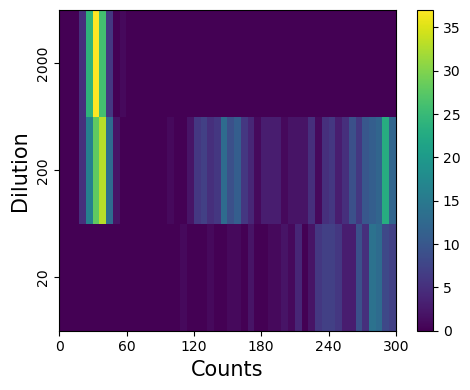

In [ ]:
fig,ax = plt.subplots(1,figsize=(5,4))
data.dil_imshow(ax,fig)
plt.tight_layout()
plt.savefig('graphs/synth/fig3a.png',dpi=500)

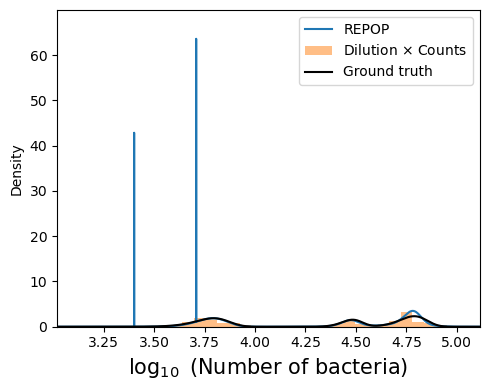

In [ ]:
fig,ax = plt.subplots(1,figsize=(5,4))
data.log_plots(ax,th_gt)
plt.tight_layout()
plt.legend()
fig.savefig('graphs/synth/fig3b',dpi=500)

In [ ]:
del data.lpkdil_n
#del data
print('Relative error', rel_error(data,case))

Relative error tensor(0.0594, dtype=torch.float64)


In [ ]:
data_noTH = load_dataset(filename,Nmax=datapoints,threshold=-1)
data_noTH.evaluate(tol=1e-5)

22
6.462355585054741 -2675.4956084027763 -552.5450957576802
6.222145668403372 -2666.929787777065 -443.24687637593433
6.095922085548297 -2670.9540219871105 -376.4626508101007
5.993777170905205 -2669.7402918045245 -326.7780543760162
5.893980216541576 -2666.9412191969313 -279.71314987723747
5.8504518052267125 -2666.071707985351 -258.9485879301154
5.817940374257555 -2665.0801999980695 -243.74488856109645
5.791962121869437 -2664.8229128033645 -231.04133828613237
5.770921180054806 -2664.7094108436204 -220.65728151600604
5.754077081744468 -2664.6328195977057 -212.33085006410636
5.7407307082583 -2664.598438620914 -205.70791502406945
5.730249074096904 -2664.5754053013634 -200.50297717354755
5.722068003869706 -2664.5449187744416 -196.45311530910448
5.715681204889754 -2664.498860504985 -193.31343565386663
5.710729649904548 -2664.4845319991955 -190.85883729521777
5.706955108657587 -2664.487235204685 -188.97384827359087
5.704058328094581 -2664.482997550768 -187.53355027062128
5.701846472664307 -266

(tensor([ 5665.4850,  4977.5436, 56777.2670,  7898.2297, 56580.0799, 56339.5470,
         53578.0553, 29510.7375, 51467.1490, 29505.7961, 49626.5738, 73845.0206,
         29603.0140, 29710.5588, 46743.4469, 30096.2437,  3112.9045, 43830.0039,
         30615.0692, 38575.8699, 31302.9630], device='cuda:0',
        dtype=torch.float64),
 tensor([  155.1401,   484.5513,  1891.2060,   420.5182,  2317.6703,  2715.9298,
          5371.7823,  2465.3153,  7862.3647,  2756.6409, 10281.4904, 16454.5630,
          3400.7707,  3711.7820, 11055.6320,  4560.3848,   460.1290, 10987.3018,
          5941.6496, 10133.2020,  7181.4111], device='cuda:0',
        dtype=torch.float64),
 tensor([0.1657, 0.1305, 0.1053, 0.0829, 0.0807, 0.0699, 0.0547, 0.0470, 0.0406,
         0.0363, 0.0308, 0.0296, 0.0237, 0.0203, 0.0178, 0.0147, 0.0142, 0.0130,
         0.0082, 0.0079, 0.0064], device='cuda:0', dtype=torch.float64))

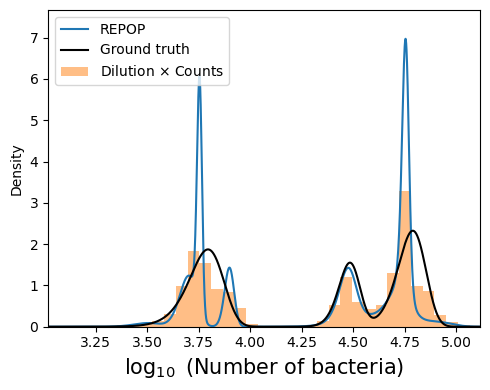

In [ ]:
fig,ax = plt.subplots(1,figsize=(5,4))
data_noTH.log_plots(ax,th_gt)
plt.tight_layout()
plt.legend()
fig.savefig('graphs/synth/fig3c',dpi=500)

In [ ]:
print('Relative error', rel_error(data_noTH,case))

Relative error tensor(0.1149, dtype=torch.float64)


/home/pessoa/Codes/CElegans-Plate/repop.py:322: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels((ax.get_xticks() * bins[-1]).astype(int))


AttributeError: 'Axes' object has no attribute 'se'

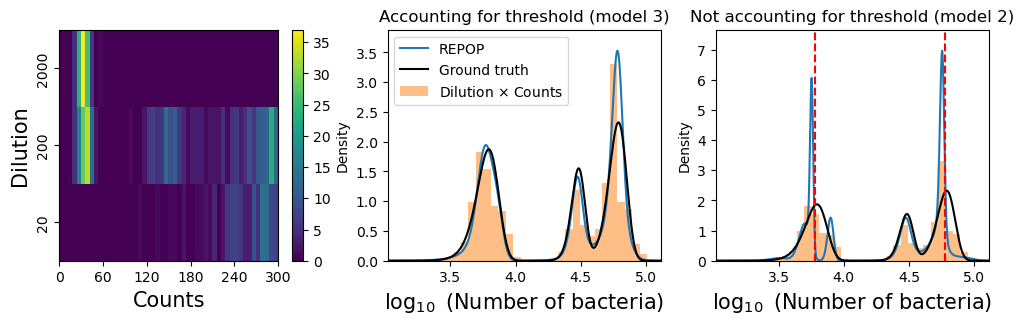

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(12,3))
data.dil_imshow(ax[0],fig)
data.log_plots(ax[1],th_gt)
data_noTH.log_plots(ax[2],th_gt)


ax[1].set_title('Accounting for threshold (model 3)',fontsize=12)
ax[1].legend()
ax[2].set_title('Not accounting for threshold (model 2)',fontsize=12)

#legend=False
for ct in np.log10(data.threshold*torch.unique(data.dils).numpy()):
    ax[2].axvline(ct,color='red',linestyle='dashed')

plt.tight_layout()
fig.savefig('graphs/synth/'+case.name,dpi=900)